In [1]:
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

# for Chinese fonts missing error, check this post: https://zhuanlan.zhihu.com/p/566430362
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 颜色代码及注解

# 黑色和白色
BLACK = '#000000'  # 黑色
WHITE = '#FFFFFF'  # 白色

# 灰色系
GREY = '#808080'    # 灰色
LIGHTGREY = '#D3D3D3'  # 浅灰
DARKGREY = '#333333'  # 深灰

# 红色系
RED = '#FF0000'     # 红色
DARKRED = '#8B0000'  # 深红
LIGHTRED = '#FF6666'  # 浅红

# 绿色系
GREEN = '#008000'   # 绿色
DARKGREEN = '#006400'  # 深绿
LIGHTGREEN = '#90EE90'  # 浅绿

# 蓝色系
BLUE = '#0000FF'    # 蓝色
DARKBLUE = '#00008B'  # 深蓝
LIGHTBLUE = '#ADD8E6'  # 浅蓝

# 青色系
CYAN = '#00FFFF'     # 青色
DARKCYAN = '#008B8B'  # 深青
LIGHTCYAN = '#E0FFFF'  # 浅青

# 黄色系
YELLOW = '#FFFF00'   # 黄色
DARKYELLOW = '#9B870C'  # 深黄
LIGHTYELLOW = '#FFFFE0'  # 浅黄

# 紫色系
PURPLE = '#800080'    # 紫色
DARKPURPLE = '#543D37'  # 深紫
LIGHTPURPLE = '#D8BFD8'  # 浅紫

# 棕色系
BROWN = '#A52A2A'     # 棕色
DARKBROWN = '#8B4513'  # 深棕
TAN = '#D2B48C'       # 棕褐色

# 粉色系
PINK = '#FFC0CB'      # 粉色
HOTPINK = '#FF69B4'    # 热粉色
LIGHTPINK = '#FFB6C1'  # 浅粉色

# 四个时期的背景颜色
background_pattern =  [LIGHTGREEN, LIGHTBLUE, LIGHTYELLOW, TAN]

%matplotlib inline

In [2]:
from matplotlib.transforms import Affine2D, offset_copy

class PeriodPlotter:
    def __init__(self, fig_size=(16, 12), xlim=(600, 920), ylim=(0,220), grid=20):
        """
        初始化HistoricalPeriodPlotter类，创建一个新的figure和axes对象。

        参数:
        fig_size (tuple[int, int]): 图形的宽度和高度，默认为(16, 8)
        xlim (tuple[int, int]): 横轴的显示范围，默认为(600, 920)
        grid (int): 横轴刻度，默认每隔20年一个刻度
        actual_range (tuple[int, int]): 实际王朝起止年份，用于后续刻度计算
        """
        self.fig, self.ax = plt.subplots(figsize=fig_size)

        xticks=np.arange(xlim[0], xlim[1]+grid, grid)
        # 设置横轴
        self.ax.set_xlim(left=xlim[0], right=xlim[1])
        # self.x0 = actual_range[0]
        # self.x1 = actual_range[1]
        self.x0 = xlim[0]
        self.x1 = xlim[1]       
        self.x_range = self.x1-self.x0
        self.ax.xaxis.set_ticks(xticks)
        self.ax.tick_params(labelbottom=True)
        # print(f"start={self.x0}, end={self.x1}, total {self.x_range}")
        
        # 设置纵轴，不显示纵轴刻度
        self.ax.set_ylim(ylim[0], ylim[1])
        self.ax.yaxis.set_visible(False)
        self.y0 = ylim[0]
        self.y1 = ylim[1]
        self.y_range = self.y1-self.y0

    
    # def put_text(self, text='Test', pos = (0.1, 0.1), ha = 'center', va = 'bottom' ):      
    #     self.ax.text(pos[0], pos[1], text, ha=ha, va=va, transform=self.ax.transAxes)
    def put_text(self, text='Test', X=25, Y=25, ha = 'center', va = 'bottom' ): 
        # 输入参数需要转成相对位置，否则显示不正常， why?
        x = X / self.x1
        y = Y / self.y1
        self.ax.text(x, y, text, ha=ha, va=va, transform=self.ax.transAxes)

    def draw_yline(self, x = 635, y = (20,30), color = 'red', lwidth = 2, alpha = 0.5):
        # normalize y
        y0 = (y[0]-self.y0)/self.y_range
        y1 = (y[1]-self.y0)/self.y_range
        
        self.ax.axvline(x=x, ymin=y0, ymax=y1, color=color, linewidth=lwidth, alpha=alpha)
    
    def draw_xline(self, y = 10, x = (635, 660), color = 'red', lwidth = 2, alpha = 0.5):
        # normalize x
        x0 = (x[0]-self.x0)/self.x_range
        x1 = (x[1]-self.x0)/self.x_range

        self.ax.axhline(y=y, xmin=x0, xmax=x1, color=color, linewidth=lwidth, alpha=alpha)  
        # not work
        # self.ax.axhline(y=y, xmin=x[0], xmax=x[1], color=color, linewidth=lwidth)

    def draw_segline_x(self, y:int, x:tuple, draw_y:bool ='both', lwidth=2, color ='black'):
        self.draw_xline(y=y, x=x, lwidth= lwidth, color=color)
        
        if draw_y in ['left','both']: 
            # self.ax.axvline(x0, ymin=y-0.01, ymax=y, color=color, linewidth=lwidth)
            self.draw_yline(x=x[0], y=(y, y+1), color=color, lwidth= lwidth//2)
        if draw_y in ['right','both']:
            # self.ax.axvline(x1, ymin=y-0.01, ymax=y, color=color, linewidth=lwidth)
            self.draw_yline(x=x[1], y=(y, y+1), color=color, lwidth= lwidth//2)

    def set_title_and_xlabel(self, title='历史时期划分', xlabel='公元年份'):
        """
        设置图形的标题和横轴标签
        """
        self.ax.set_title(title)
        self.ax.set_xlabel(xlabel)
    
    def show_plot(self):
        """
        显示图形
        """
        plt.show()


def plot_periods_from_csv(plotter, file_name, colors_list):
    """
    从指定的CSV文件中读取数据并绘制历史时期背景。

    参数:
    file_name (str): CSV文件路径
    colors_list (list[str]): 颜色列表，用于填充各个时期
    """
    df = pd.read_csv(file_name)
    
    periods = df[['起始年代', '结束年代']].values

    # 在水平轴（X轴）上的一个区间内填充颜色
    for i, (start, end) in enumerate(periods):
        plotter.ax.axvspan(start, end, facecolor=colors_list[i], alpha=0.2)

    x_pos = (df['起始年代'] + df['结束年代']) // 2
    y_pos = plotter.y1 - 10
    
    for i, x_pos in enumerate(x_pos):
        period_name = df.iloc[i]['时期']
        plotter.ax.text(x_pos, y_pos, period_name,
                     ha='center', fontsize=32, color=PURPLE, alpha=0.6,
                     rotation=90 if len(period_name) > 4 else 0)

    # 可选：添加竖直虚线作为区分
    for start, end in zip(periods[:-1, 1], periods[1:, 0]):
        plotter.ax.axvline(x=start, color='black', linewidth=0.5, linestyle='--')


def txt_overlap_process():
    pass

def plot_emperors_from_csv(plotter, emperor_file_name, y_offset=1, text_color='red', year_limits=4):
    """
    从指定的CSV文件中读取皇帝在位数据并在第一个坐标轴上方绘制线段及庙号。

    参数:
    emperor_file_name (str): 包含皇帝信息的CSV文件路径
    y_offset (float): 线段相对于原坐标x轴的垂直偏移量，默认为1(x轴向上1个y单位)
    text_color (str): 文字颜色
    year_limits（int）：年数，小于等于该值的皇帝庙号不显示了（画不下）
    """
    emperors_df = pd.read_csv(emperor_file_name)
    font_size = 8
    
    # 如果文字扎堆的处理
    overlap_num = 0 # >0: 小心标记重叠
    x_shift_step = 3
    y_shift_step = 5
    
    arrow_color = PINK

    for index, row in emperors_df.iterrows():
        name = row['姓名']
        #temple_name = row['庙号']
        temple_name = row['庙号'].replace("唐", "")
        start_year = row['在位开始时间']
        end_year = row['在位结束时间']
        years = row['在位年数']
        remarks = row['备注']
        # print(f"{temple_name}:{start_year}--{end_year}")
        # 绘制线段
        plotter.draw_segline_x(y=y_offset+1, x=(start_year, end_year), draw_y='left', color = text_color)
        # 添加庙号和备注文本
        mid_year = (start_year + end_year) // 2
        text_transform = offset_copy(plotter.ax.transData, fig=plotter.fig, y=5, units='dots')
        emperor_text = temple_name
        if years >= year_limits: 
            plotter.ax.text(mid_year, y_offset, emperor_text,
                         transform=text_transform,
                         ha='center', va='bottom', fontsize=font_size, color = text_color)
            overlap_num = 0 # reset overlap 

        else: # 在位时间很短 < year_limits，画不下,标注需要用箭头指向标注处理一下
            # 箭头的起始位置
            x_p = start_year-3 + overlap_num*x_shift_step 
            y_p = y_offset   + (overlap_num+1)*y_shift_step # overlap_num初始值=0，但是y坐标初始就要上移
            arrow_start = (x_p, y_p)
            arrow_end   = (start_year, y_offset)
            
            plotter.ax.annotate(emperor_text, xy=arrow_end, xycoords='data', xytext=arrow_start, 
                             textcoords='data', arrowprops=dict(arrowstyle="->", linewidth=2, shrinkA=0, shrinkB=0, color=arrow_color),
                             fontsize=font_size, color=text_color)  
            # 在arrowprops字典中设置箭头的属性，包括颜色
            overlap_num += 1



def plot_poet_from_csv(plotter, poet_file_name, y_offset=10, color='black'):
    poet_df = pd.read_csv(poet_file_name)
    poet_df.sort_values(by='出生年份', inplace=True) #从小到大排序

    y_offset_step = 5
    this_y_offset = y_offset
    for index, row in poet_df.iterrows():
        name = row['姓名']
        name_word = row['字']
        born_year = row['出生年份']
        end_year = row['去世年份']
        years = row['年龄']
        remarks = row['备注']
        # 绘制线段
        plotter.draw_segline_x(y=this_y_offset+1, x=(born_year, end_year), draw_y='both', color=color)
        # 添加庙号和备注文本
        mid_year = (born_year + end_year) // 2
        text_transform = offset_copy(plotter.ax.transData, fig=plotter.fig, y=5, units='dots')
        emperor_text = name + '(' + name_word + ')'

        plotter.ax.text(mid_year, this_y_offset, emperor_text,
                     transform=text_transform,
                     ha='center', va='bottom', fontsize=8, color=color)

        this_y_offset += y_offset_step


def plot_events_from_csv(plotter, file_name, offset=10, rect_height=6, color=GREY, alpha = 0.2):
    """
    从指定的CSV文件中读取数据并绘制历史事件背景。

    参数:
    file_name (str): CSV文件路径
    offset(int): 
    """
    df = pd.read_csv(file_name)
    df.sort_values(by=['起始年代', '结束年代'], inplace=True) #从小到大排序

    this_offset = offset
    debug = 1
    event_label = 0  # 标注不下的那些event，用数字来代替，并在外围标注
    for index, row in df.iterrows():
        name = row['事件名称']
        type = row['类型']
        start = row['起始年代']
        end = row['结束年代']
        years = row['历时']
        # remarks = row['备注']

        # 在（x0,y0）(x1,y1)的矩形范围内填充
        if end > start:
            plotter.ax.fill_between(x=[start, end], y1=this_offset, y2=this_offset+rect_height, facecolor=GREY, alpha=alpha)
        elif end == start: # 短时间event，不填充
            plotter.draw_yline(x=start, y=(this_offset, this_offset+rect_height), color=GREY)
            

        txt_y = this_offset + rect_height //2 - 2 # 向下一点点
        txt_x = (start + end) // 2
        
        if (end - start) > 25:  
            plotter.ax.text(txt_x, txt_y, name, ha='center', fontsize= 16, color=DARKGREY, alpha=0.8)
        else: # <=25year的event，用其它方法标注
            # 箭头的起始位置
            # arrow_end = (start, this_offset)
            # arrow_start = (start-25, txt_y)
            # plotter.ax.annotate(name, xy=arrow_end, xycoords='data', xytext=arrow_start, 
            #                  textcoords='data', arrowprops=dict(arrowstyle="->", linewidth=2, shrinkA=0, shrinkB=0),
            #                  fontsize=16, color=DARKGREY)  # 可选设置字体大小和颜色
            event_label += 1
            legend_str = f"{event_label}: {name}"
            plotter.ax.text(txt_x, txt_y, event_label, ha='center', fontsize= 16, color=DARKGREY, alpha=0.8)
            plotter.put_text(text=legend_str, X=25, Y=txt_y, ha='left' )
            
        this_offset += (rect_height+2)



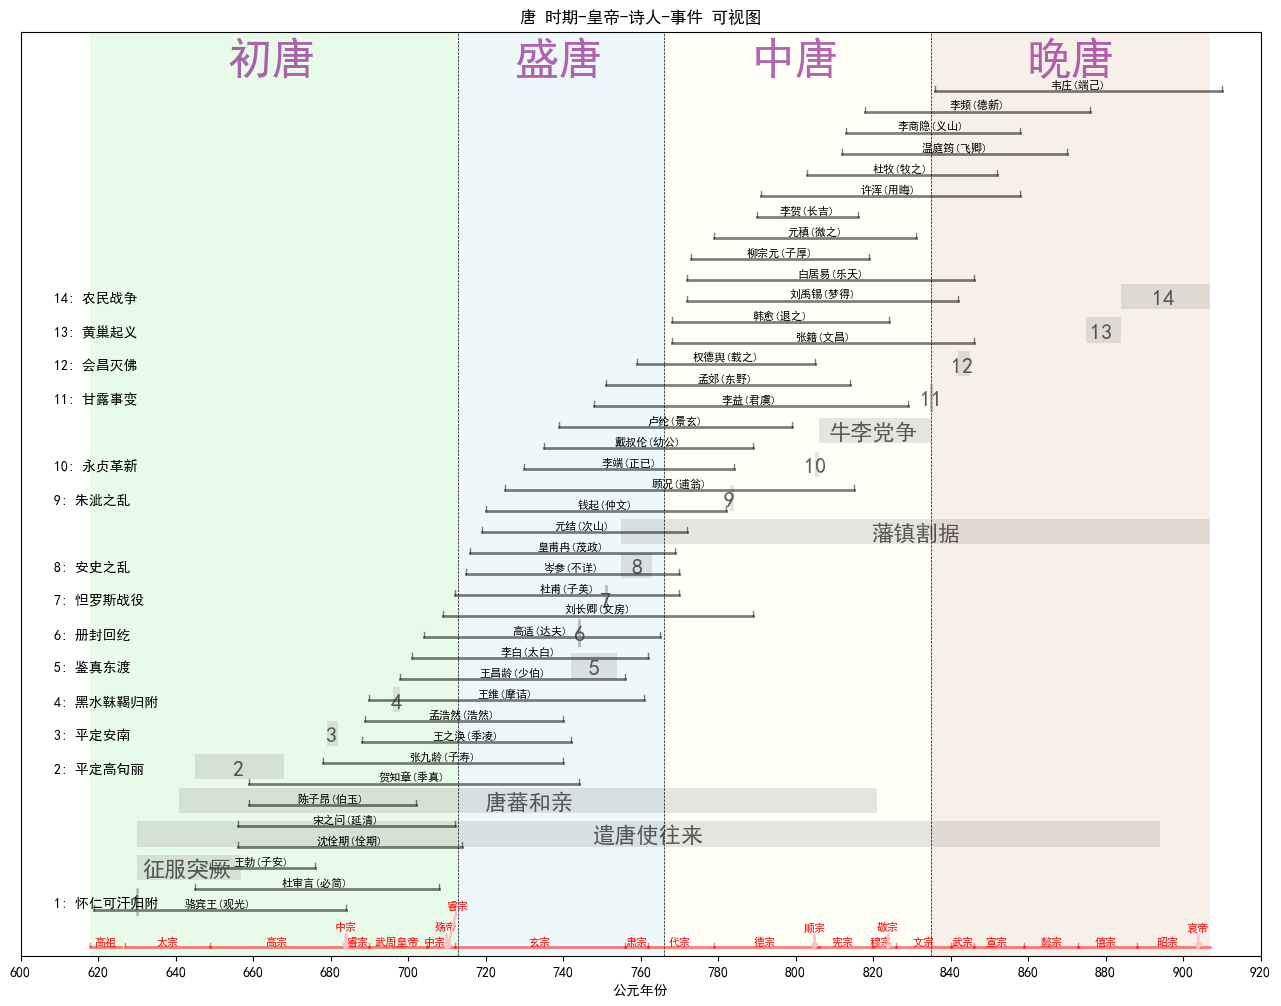

In [3]:
plotter = PeriodPlotter()
plotter.set_title_and_xlabel('唐 时期-皇帝-诗人-事件 可视图')

plot_periods_from_csv(plotter,'tang-phase.csv',background_pattern)
plot_emperors_from_csv(plotter,'tang-emperor.csv')
plot_poet_from_csv(plotter,'tang-poet.csv')
plot_events_from_csv(plotter,'tang-events.csv')

# 保存图表为图片
plt.savefig('tang.png')

plotter.show_plot()